# Climate Analysis and Exploration

##  Summary:
Hawaii had up to 6.5 inches of precipitation in the last twelve months. Average precipitation was 0.176. 
The minimum temperature reordered in Hawaii in the last year was 55 F, and the maximum was 90F. The aggregate weather data was used to compute daily normal for the intended trip during the year. 
Minimum, maximum, and average temperature during the trip were 62, 74, and 62 F respectively during the trip.

 Description of Data (what is sakila, where did you get it, what tables are in there)
2) Methodology (types of SQL queries used)
3) Broad summary of results/ SQL output
4) Conclusions/Final Thoughts
5) Limitations/Future data exploration ideas of Sakila (edited)


In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:

import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [6]:
#Creating engine 
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)


In [7]:
# reflecting an existing database into a new model
Base = automap_base()

# reflecting the tables
Base.prepare(engine, reflect=True)

In [8]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
#Enables to know what in each each tables
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [12]:
from sqlalchemy import create_engine, inspect, MetaData,Table
from sqlalchemy.engine.reflection import Inspector

In [13]:
metadata = MetaData()

In [14]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [15]:
meta = MetaData()
user_table = Table('measurement', meta)
insp = Inspector.from_engine(engine)
insp.reflecttable(user_table, None)

In [16]:
insp.get_columns('measurement')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [17]:
insp.get_columns('station')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [18]:
columns = inspector.get_columns("Measurement")
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [19]:
columns = inspector.get_columns("Station")
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [20]:
#Total dates
session.query(func.count(Measurement.date)).all()

[(19550)]

In [21]:
#Earliest date
first_date = session.query(Measurement.date).order_by(Measurement.date).first()
first_date

('2010-01-01')

In [22]:
#Last date date
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

In [23]:
engine.execute("SELECT * FROM Measurement LIMIT 5").fetchall()


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [24]:
engine.execute("SELECT * FROM Station LIMIT 5").fetchall()


[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [26]:
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print(one_year_ago)

2016-08-23


In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > one_year_ago).all()
results

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [34]:
df = pd.DataFrame(results)
df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


In [35]:
df2 = df.set_index("date")
df2.head()

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


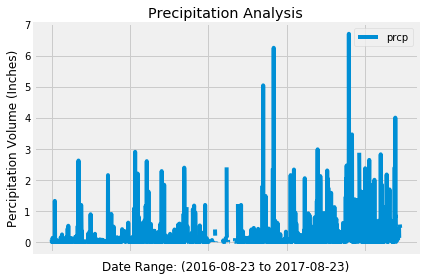

In [38]:
#fig = plt.figure(figsize=(200,100))
df.plot("date", "prcp")
#df.grid(True)
plt.xlabel("Date Range: (2016-08-23 to 2017-08-23)")
plt.ylabel("Percipitation Volume (Inches)")
plt.title("Precipitation Analysis")
plt.legend()
plt.tight_layout()
plt.show()


In [43]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [44]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()


[(9)]

In [45]:
# First station
session.query(Station.station).order_by(Station.station.desc()).first()

('USC00519523')

In [46]:
# Active Stations
Desc_active_stations = session.query(Measurement.station, func.count(Measurement.prcp)).\
                                     group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).all()
Desc_active_stations

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [47]:
#Most active Station 
Most_active_stations = session.query(Measurement.station).\
                                     group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).\
                                     limit(1).scalar()
Most_active_stations

'USC00519281'

In [48]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
Most_active_station = session.query(Measurement.station).\
                                     group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).\
                                     limit(1).scalar()
Most_active_station


'USC00519281'

In [49]:
# time of observation (TOBs)
tobs_results = session.query(Measurement.station, Measurement.tobs).filter(Measurement.date.between("2016.08.23", "2017.08.23")).all()
tobs_results

[('USC00519397', 62.0),
 ('USC00519397', 66.0),
 ('USC00519397', 63.0),
 ('USC00519397', 62.0),
 ('USC00519397', 63.0),
 ('USC00519397', 64.0),
 ('USC00519397', 66.0),
 ('USC00519397', 60.0),
 ('USC00519397', 64.0),
 ('USC00519397', 63.0),
 ('USC00519397', 78.0),
 ('USC00519397', 67.0),
 ('USC00519397', 67.0),
 ('USC00519397', 65.0),
 ('USC00519397', 66.0),
 ('USC00519397', 67.0),
 ('USC00519397', 66.0),
 ('USC00519397', 72.0),
 ('USC00519397', 73.0),
 ('USC00519397', 71.0),
 ('USC00519397', 72.0),
 ('USC00519397', 72.0),
 ('USC00519397', 72.0),
 ('USC00519397', 69.0),
 ('USC00519397', 72.0),
 ('USC00519397', 71.0),
 ('USC00519397', 65.0),
 ('USC00519397', 64.0),
 ('USC00519397', 67.0),
 ('USC00519397', 67.0),
 ('USC00519397', 68.0),
 ('USC00519397', 70.0),
 ('USC00519397', 61.0),
 ('USC00519397', 65.0),
 ('USC00519397', 72.0),
 ('USC00519397', 73.0),
 ('USC00519397', 76.0),
 ('USC00519397', 64.0),
 ('USC00519397', 62.0),
 ('USC00519397', 61.0),
 ('USC00519397', 71.0),
 ('USC00519397',

In [50]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

temperature_intel = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == Most_active_station).\
    filter(Measurement.date.between("2016.08.23", "2017.08.23")).\
    order_by(Measurement.date).all()
temperature_intel

[('USC00519281', '2017-01-01', 72.0),
 ('USC00519281', '2017-01-02', 70.0),
 ('USC00519281', '2017-01-03', 64.0),
 ('USC00519281', '2017-01-04', 63.0),
 ('USC00519281', '2017-01-05', 63.0),
 ('USC00519281', '2017-01-06', 62.0),
 ('USC00519281', '2017-01-07', 70.0),
 ('USC00519281', '2017-01-08', 70.0),
 ('USC00519281', '2017-01-09', 62.0),
 ('USC00519281', '2017-01-10', 62.0),
 ('USC00519281', '2017-01-11', 63.0),
 ('USC00519281', '2017-01-12', 65.0),
 ('USC00519281', '2017-01-13', 69.0),
 ('USC00519281', '2017-01-14', 77.0),
 ('USC00519281', '2017-01-15', 70.0),
 ('USC00519281', '2017-01-16', 74.0),
 ('USC00519281', '2017-01-17', 69.0),
 ('USC00519281', '2017-01-18', 72.0),
 ('USC00519281', '2017-01-19', 71.0),
 ('USC00519281', '2017-01-20', 69.0),
 ('USC00519281', '2017-01-21', 71.0),
 ('USC00519281', '2017-01-22', 71.0),
 ('USC00519281', '2017-01-23', 72.0),
 ('USC00519281', '2017-01-24', 72.0),
 ('USC00519281', '2017-01-25', 69.0),
 ('USC00519281', '2017-01-26', 70.0),
 ('USC005192

No handles with labels found to put in legend.


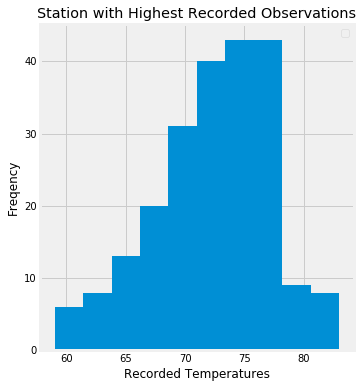

In [51]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
fig2 = plt.figure(figsize=(5,6))
plt.grid(True)
temp_intel_df = pd.DataFrame(temperature_intel)
plt.hist(temp_intel_df['tobs'])
bin_size = 12
plt.xlabel("Recorded Temperatures")
plt.ylabel("Freqency")
plt.title("Station with Highest Recorded Observations")
plt.legend()
plt.show()
 

In [33]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))




[(62.0, 69.57142857142857, 74.0)]


In [47]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

Temp=[]
start_date='2012-02-28'
end_date='2012-03-05'
def calc_temps(start_date, end_date):
    results=session.query(func.max(Measurement.tobs).label("max_tobs"), \
                          func.min(Measurement.tobs).label("min_tobs"),\
                          func.avg(Measurement.tobs).label("avg_tobs")).\
                          filter(Measurement.date.between(start_date , end_date))  
    res = results.one()
    res
    TMax = res.max_tobs
    TMin= res.min_tobs
    TAvg= res.avg_tobs
    Temp.append(TMax)
    Temp.append(TMin)
    Temp.append(TAvg)
  
calc_temps(start_date, end_date)
Temp


[74.0, 62.0, 69.57142857142857]

In [48]:
TAvg=Temp[2]
TMin=Temp[1]
TMax=Temp[0]

C:\Users\Sisay\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


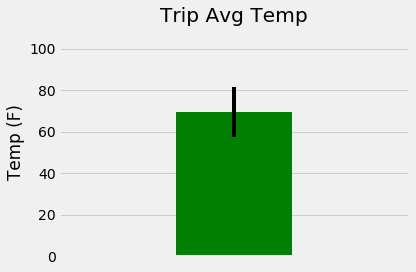

In [49]:
plt.bar( 1,TAvg, color = 'green', yerr = TMax-TMin, align='center')
plt.xlim(-0.2, 2.2)
plt.ylim([0, 110])
plt.axes().get_xaxis().set_visible(False)
plt.title('Trip Avg Temp')
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.show()

In [52]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

Rainfall_results = session.query(Measurement.station, func.count(Measurement.prcp)).\
                   group_by(Measurement.station).filter(Measurement.date.between("2016.08.23", "2017.08.23")).all()
Rainfall_results


[('USC00513117', 212),
 ('USC00514830', 167),
 ('USC00516128', 204),
 ('USC00517948', 43),
 ('USC00519281', 221),
 ('USC00519397', 230),
 ('USC00519523', 190)]

In [55]:
def precipitation(start_date, end_date):
    
        # Docstring for the function `calc_temps`
    """Precipitation information per weather station
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        A list of tuples containing precipitation amount, station, name, latitude, longitude, and elevation in descending order.
    """
    
    sel = [Measurement.station, 
           Station.name, 
           Station.latitude, 
           Station.longitude, 
           Station.elevation, 
           Measurement.prcp]
    
    return session.query(*sel).\
            filter(Measurement.station == Station.station).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).group_by(Measurement.station).order_by(Measurement.prcp.desc()).all()

print(precipitation('2017-08-09','2017-08-23'))

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.15), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]
